In [1]:
import pytesseract


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:
import ultralytics
import pytesseract
from PIL import Image

best.pt:   0%|          | 0.00/6.24M [00:00<?, ?B/s]


image 1/1 C:\Users\Hp\Documents\HandwrittenRecognition\images\a03-017-06-00.png: 544x640 (no detections), 168.6ms
Speed: 10.0ms preprocess, 168.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)
Results saved to detected
Detected Text:
at



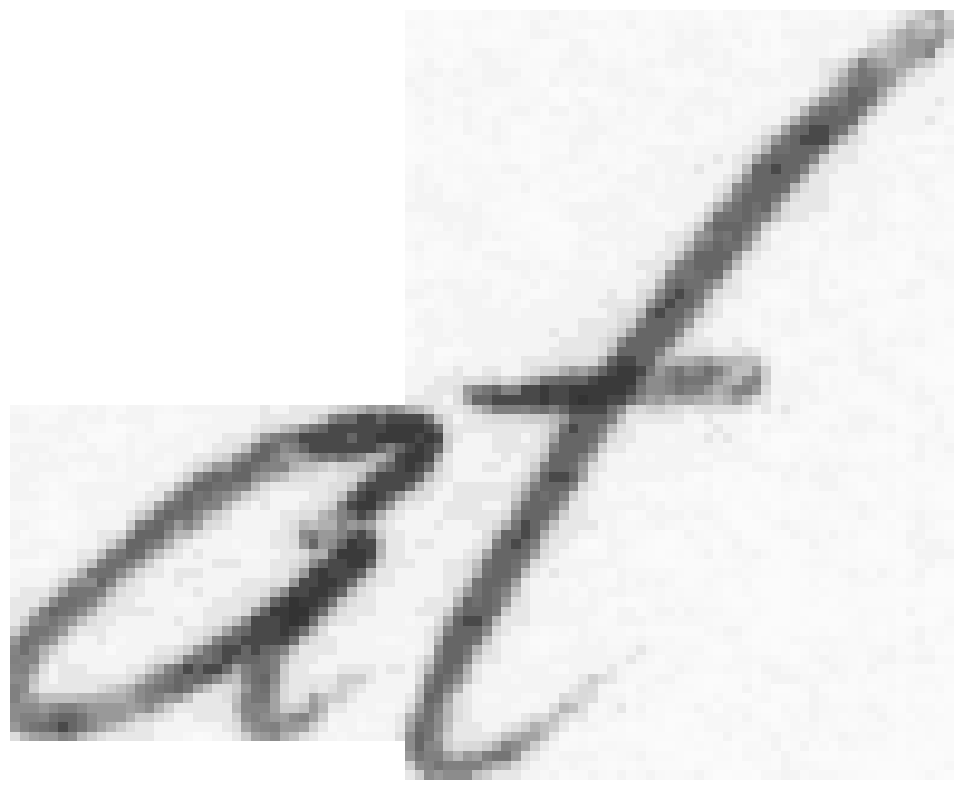

In [3]:
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from matplotlib import pyplot as plt
import pytesseract
from PIL import Image
import os

# Load the YOLO model from the Hugging Face repository
model_path = hf_hub_download(local_dir=".",
                             repo_id="armvectores/yolov8n_handwritten_text_detection",
                             filename="best.pt")
model = YOLO(model_path)

# Load the test image (replace with your local image path)
image_folder = r"C:\Users\Hp\Documents\HandwrittenRecognition\images"
image_filename = "a03-017-06-00.png"  # Change this to the actual image file you want to use
test_blank_path = os.path.join(image_folder, image_filename)

# Perform object detection
res = model.predict(source=test_blank_path, project='.', name='detected', exist_ok=True, save=True, show=False, show_labels=False, show_conf=False, conf=0.5)

# The detected image path can vary based on YOLO's output settings; ensure it's correct
detected_image_path = os.path.join('detected', 'a03-017-06-00.png')  # Update with correct path if needed
detected_image = Image.open(detected_image_path)

# If Tesseract is not in your PATH, specify the full path to the executable
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Perform OCR on the detected text regions
detected_text = pytesseract.image_to_string(detected_image)

# Print the extracted text
print("Detected Text:")
print(detected_text)

# Visualize the detected image
plt.figure(figsize=(15,10))
plt.imshow(detected_image)
plt.axis('off')
plt.show()

